In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from sklearn.decomposition import FastICA

In [2]:
eeg = pd.read_csv('eeg_SSTRESS.csv')
eeg.head()

,Timestamp,TP9,AF7,AF8,TP10,AUX
0,2023-10-11 16:09:51.717379,806.263733,784.908447,801.831482,802.637390,797.399292
1,2023-10-11 16:09:51.719884,802.637390,789.340637,802.234436,799.010986,724.468872
2,2023-10-11 16:09:51.721689,790.146545,786.923096,800.622681,794.578735,689.010986
3,2023-10-11 16:09:51.722550,787.728943,781.684998,802.234436,796.593384,724.468872
4,2023-10-11 16:09:51.723582,794.578735,784.102539,804.652039,797.802185,777.655701


In [4]:
eeg.isnull().sum()

Timestamp    0
TP9          0
AF7          0
AF8          0
TP10         0
AUX          0
dtype: int64

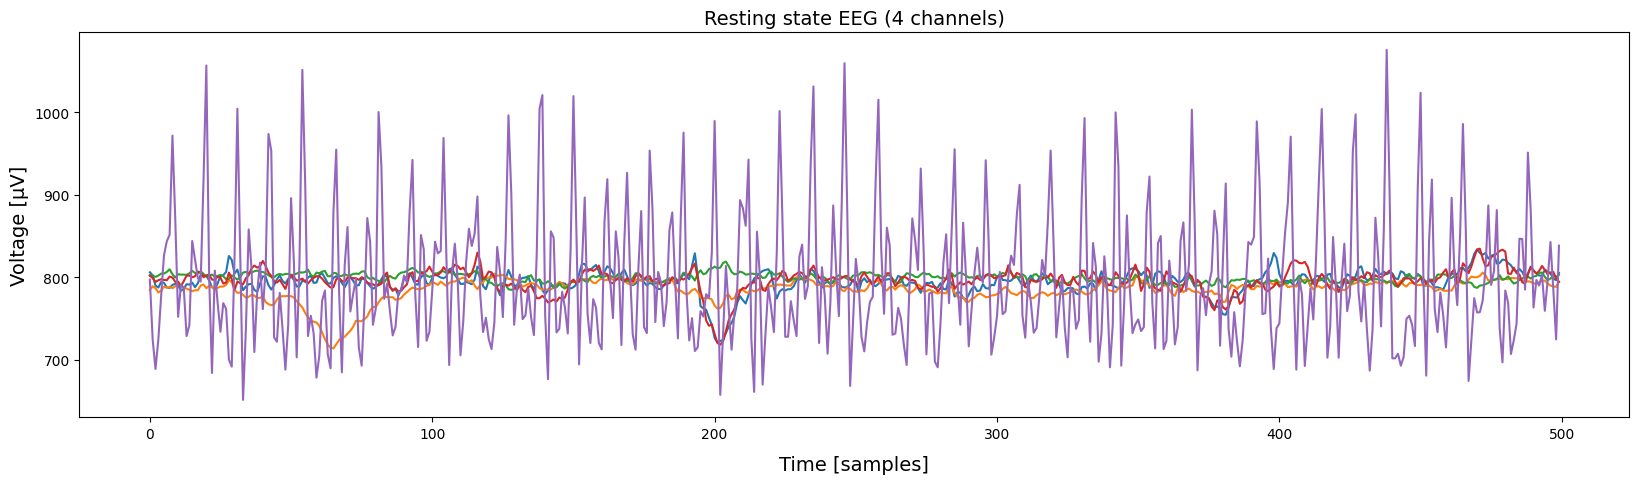

In [5]:
eeg.iloc[0:500].plot(figsize=(20,5), legend=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=10)
plt.ylabel('Voltage [\u03BCV]', fontsize=14)
plt.title('Resting state EEG (4 channels)', fontsize=14)
#plt.savefig('eeg_all.png')
plt.show()

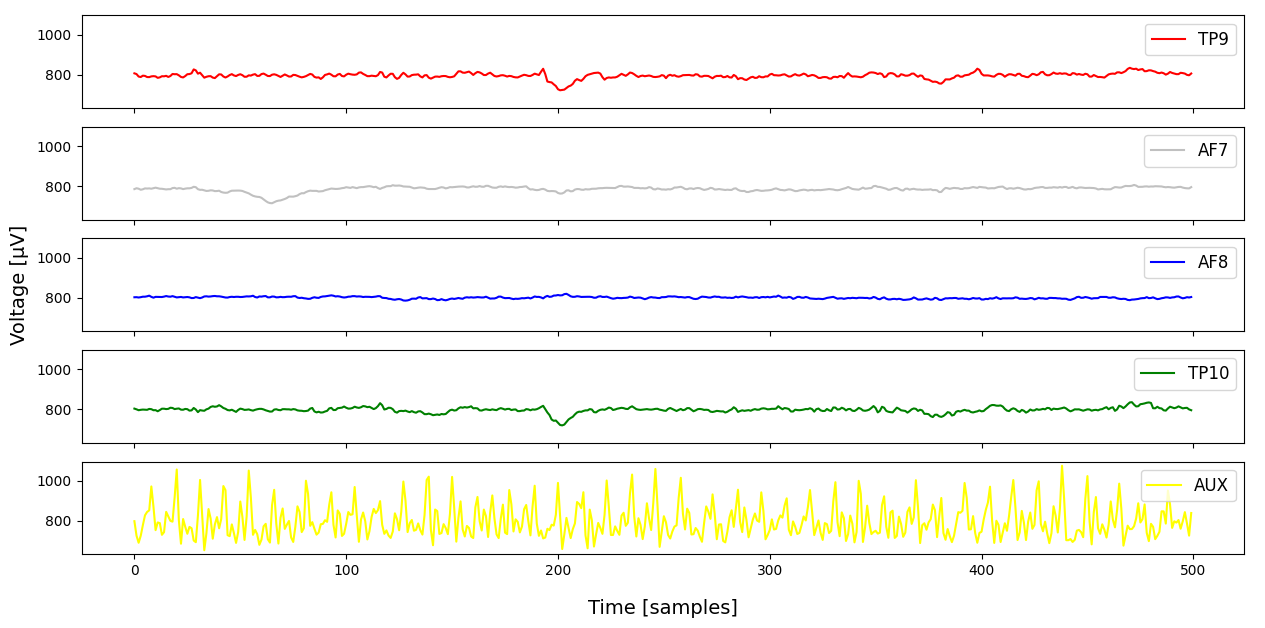

In [6]:
fig, axs = plt.subplots(5,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg['TP9'].iloc[0:500], label='TP9', color='red')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg['AF7'].iloc[0:500], label='AF7', color='silver')
axs[1].legend(loc="upper right", fontsize=12)
axs[2].plot(eeg['AF8'].iloc[0:500], label='AF8', color='blue')
axs[2].legend(loc="upper right", fontsize=12)
axs[3].plot(eeg['TP10'].iloc[0:500], label='TP10', color='green')
axs[3].legend(loc="upper right", fontsize=12)
axs[4].plot(eeg['AUX'].iloc[0:500], label='AUX', color='yellow')
axs[4].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('fp1_fp2.png')
plt.show()

In [7]:
print(eeg.columns)

Index(['Timestamp', 'TP9', 'AF7', 'AF8', 'TP10', 'AUX'], dtype='object')


In [8]:
eeg = eeg.copy()  # Buat salinan DataFrame
timestamps = eeg['Timestamp']
eeg = eeg.drop(['Timestamp', 'AUX'], axis=1)  # Hapus kolom waktu dari salinan DataFrame

In [9]:
ica = FastICA(n_components=4, random_state=0, tol=0.0001)
comps = ica.fit_transform(eeg)

C:\Users\MUH. FITRAH RAMADHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


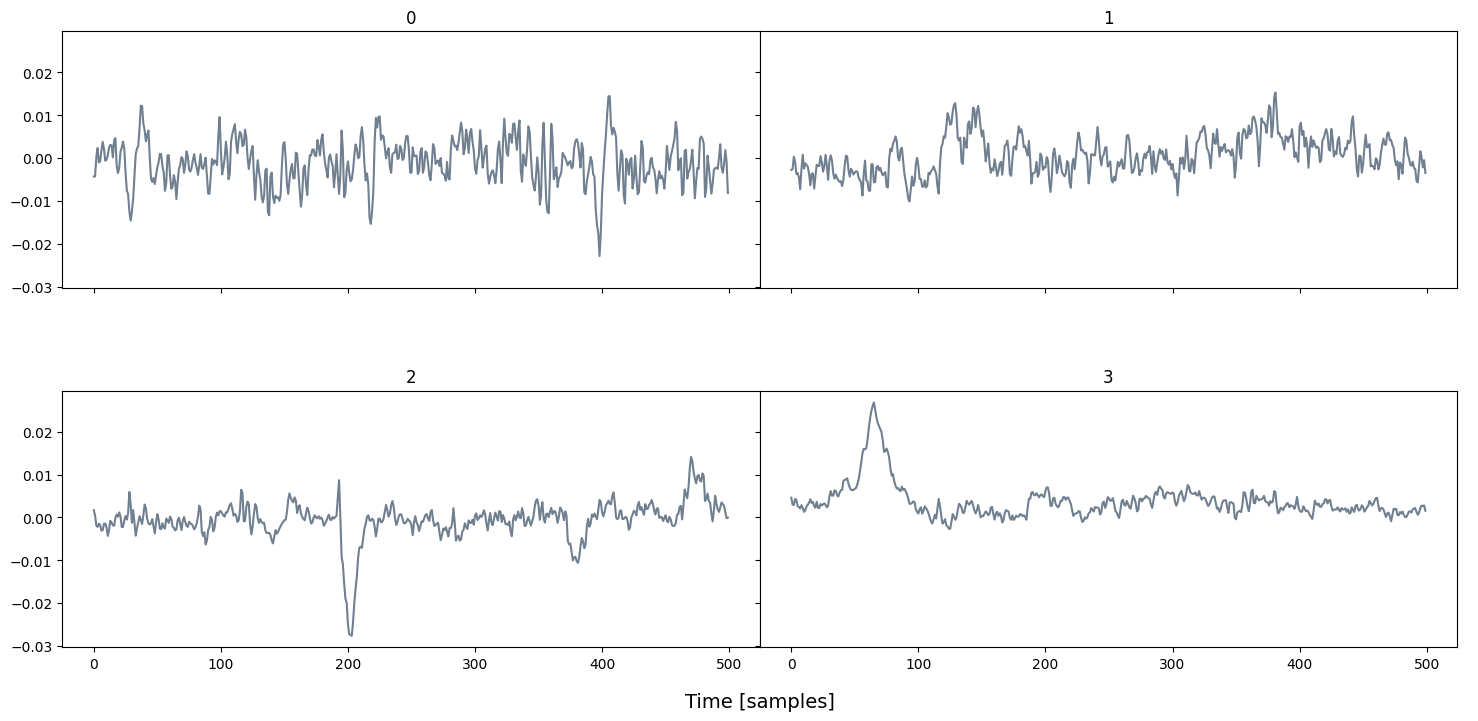

In [10]:
fig, axs = plt.subplots(2,2, figsize=(18, 8), sharex=True, sharey=True)
fig.subplots_adjust(hspace = .4, wspace=0)
axs = axs.ravel()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)

for i in range(4):
    axs[i].plot(comps[0:500, i], color='slategrey')
    axs[i].set_title(str(i))

In [11]:
comps_restored = comps.copy()
comps_restored[:,[2,3]] = 0# set artefact components to zero
restored = ica.inverse_transform(comps_restored)

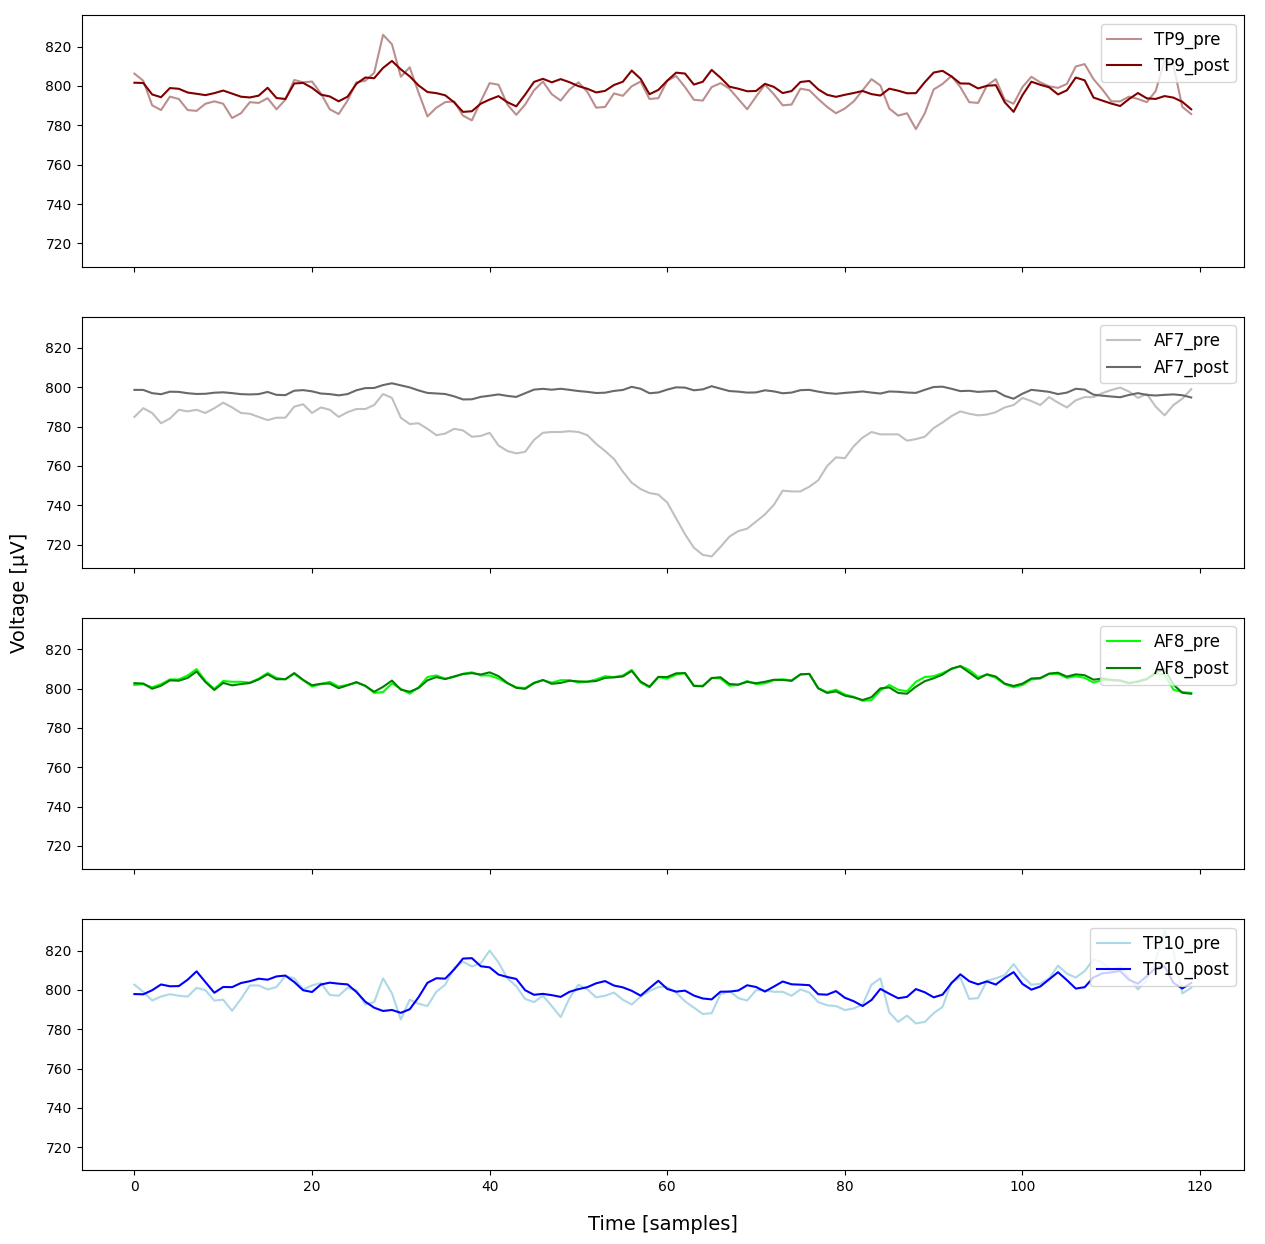

In [12]:
fig, axs = plt.subplots(4,1, figsize=(15, 15), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg['TP9'].iloc[0:120], label='TP9_pre', color='rosybrown')
axs[0].plot(np.arange(0,120), restored[0:120, 0], label='TP9_post', color='maroon')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg['AF7'].iloc[0:120], label='AF7_pre', color='silver')
axs[1].plot(np.arange(0,120), restored[0:120, 1], label='AF7_post', color='dimgray')
axs[1].legend(loc="upper right", fontsize=12)
axs[2].plot(eeg['AF8'].iloc[0:120], label='AF8_pre', color='lime')
axs[2].plot(np.arange(0,120), restored[0:120, 2], label='AF8_post', color='green')
axs[2].legend(loc="upper right", fontsize=12)
axs[3].plot(eeg['TP10'].iloc[0:120], label='TP10_pre', color='lightblue')
axs[3].plot(np.arange(0,120), restored[0:120, 3], label='TP10_post', color='blue')
axs[3].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('post_ica.png')
plt.show()

In [13]:
%matplotlib qt5
plt.ion()

sfreq = 500
visible = 2000 # time shown in plot (in samples)

sy1=deque(np.zeros(visible), visible)
sy2=deque(np.zeros(visible), visible)
sy3=deque(np.zeros(visible), visible)
sy4=deque(np.zeros(visible), visible)
sy5=deque(np.zeros(visible), visible)
sy6=deque(np.zeros(visible), visible)
sy7=deque(np.zeros(visible), visible)
sy8=deque(np.zeros(visible), visible)
sy9=deque(np.zeros(visible), visible)
sx=deque(np.zeros(visible), visible)
data_length = np.linspace(0,eeg.shape[0]+1,num=eeg.shape[0])
data_length /= sfreq

fig=plt.figure(figsize=(20,18))
ah1=fig.add_subplot(511)
ah1.set_xlabel("Time [samples]", fontsize=14, labelpad=10)
ah1.set_ylabel("Voltage [\u03BCV]", fontsize=14)
l1, = ah1.plot(sx, sy1, color='rosybrown', label='TP9_pre')
l2, = ah1.plot(sx, sy2, color='maroon', label='TP9_post')
ah1.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)
ah2=fig.add_subplot(512)
ah2.set_xlabel("Time [samples]", fontsize=14, labelpad=10)
ah2.set_ylabel("Voltage [\u03BCV]", fontsize=14)
l3, = ah2.plot(sx, sy3, color='silver', label='AF7_pre')
l4, = ah2.plot(sx, sy4, color='dimgray', label='AF7_post')
ah2.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)
ah3=fig.add_subplot(513)
ah3.set_xlabel("Time [samples]", fontsize=14, labelpad=10)
ah3.set_ylabel("Voltage [\u03BCV]", fontsize=14)
l5, = ah3.plot(sx, sy5, color='lime', label='AF8_pre')
l6, = ah3.plot(sx, sy6, color='green', label='AF8_post')
ah3.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)
ah4=fig.add_subplot(514)
ah4.set_xlabel("Time [samples]", fontsize=14, labelpad=10)
ah4.set_ylabel("Voltage [\u03BCV]", fontsize=14)
l7, = ah4.plot(sx, sy7, color='lightblue', label='TP10_pre')
l8, = ah4.plot(sx, sy8, color='blue', label='TP10_post')
ah4.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)
ah5=fig.add_subplot(515)
ah5.set_xlabel("Time [s]", fontsize=14, labelpad=10)
l9, = ah5.plot(sx, sy9, color='slategrey', label='ICA Comp 4')
ah5.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

x_data=0

while x_data+visible <= 30000: 
   
    sy1.extend(eeg['TP9'].iloc[x_data:x_data+visible])
    sy2.extend(restored[x_data:x_data+visible, 0])
    sy3.extend(eeg['AF7'].iloc[x_data:x_data+visible])
    sy4.extend(restored[x_data:x_data+visible, 1])
    sy5.extend(eeg['AF8'].iloc[x_data:x_data+visible])
    sy6.extend(restored[x_data:x_data+visible, 2])
    sy7.extend(eeg['TP10'].iloc[x_data:x_data+visible])
    sy8.extend(restored[x_data:x_data+visible, 3])
    sy9.extend(comps[x_data:x_data+visible, 3])
    sx.extend(data_length[x_data:x_data+visible])

    l1.set_ydata(sy1)  
    l2.set_ydata(sy2)
    l3.set_ydata(sy3)  
    l4.set_ydata(sy4)
    l5.set_ydata(sy5)
    l6.set_ydata(sy6)
    l7.set_ydata(sy7)  
    l8.set_ydata(sy8)
    l9.set_ydata(sy9)
    l1.set_xdata(sx)
    l2.set_xdata(sx)
    l3.set_xdata(sx)
    l4.set_xdata(sx)
    l5.set_xdata(sx)
    l6.set_xdata(sx)
    l7.set_xdata(sx)
    l8.set_xdata(sx)
    l9.set_xdata(sx)

    msy1=np.mean(sy1)
    msy3=np.mean(sy3)
    msy5=np.mean(sy5)
    msy7=np.mean(sy7)
    msy9=np.mean(sy9)

    ah1.set_ylim(-120+msy1, 200+msy1)
    ah1.set_xlim(data_length[x_data], data_length[x_data+visible])
    ah2.set_ylim(-120+msy3, 200+msy3)
    ah2.set_xlim(data_length[x_data], data_length[x_data+visible])
    ah3.set_ylim(-120+msy5, 200+msy5)
    ah3.set_xlim(data_length[x_data], data_length[x_data+visible])
    ah4.set_ylim(-120+msy7, 200+msy7)
    ah4.set_xlim(data_length[x_data], data_length[x_data+visible])
    ah5.set_ylim(-0.03+msy9, 0.02+msy9)
    ah5.set_xlim(data_length[x_data], data_length[x_data+visible])

    x_data += 25

    fig.canvas.draw()
    fig.canvas.flush_events()
    

In [14]:
eeg['Timestamp'] = timestamps

In [16]:
# Buat DataFrame baru dengan data yang sudah di-restorasi
restored_df = pd.DataFrame({
    'Timestamp': timestamps,  # Tambahkan kembali kolom Timestamp
    # 'TP9_pre': eeg['TP9'],
    'TP9': restored[:, 0],
    # 'AF7_pre': eeg['AF7'],
    'AF7': restored[:, 1],
    # 'AF8_pre': eeg['AF8'],
    'AF8': restored[:, 2],
    # 'TP10_pre': eeg['TP10'],
    'TP10': restored[:, 3],
    # 'ICA_Comp_4': comps[:, 3]  # Ganti nama sesuai kebutuhan
})

# Simpan DataFrame ke file CSV
restored_df.to_csv('Fix_Hasil.csv', index=False)  # Ganti nama file sesuai kebutuhan